In [11]:
# Part 1 - Loading and Initial Exploration
# 1- Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 2- Load the Dataset
# Load the CSV file
df = pd.read_csv('data.csv')

# Display the first 10 rows
print(df.head(10))

# Display the last 5 rows
print(df.tail(5))

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 3- Dataset Overview
# Check the shape of the dataset (number of rows and columns)
print(df.shape)

# Display all column names
print(df.columns.tolist())

# Check the data types of each column
print(df.dtypes)

#Use .info() to see a summary 
print(df.info())

# Generate descriptive statistics using .describe()
print(df.describe())
print(df.describe(include='object'))

# How many employees are in this dataset?
print(df.shape[0])

# How many columns do we have?
print(df.shape[1])

# How many numerical columns vs categorical columns?
print(df.select_dtypes(include=[np.number]).shape[1])
print(df.select_dtypes(include=['object']).shape[1])

# Are there any missing values?
print(df.isnull().sum())

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 4- Unique Values Exploration
# List all unique values in the Department column
print(df['Department'].unique())

# Count how many unique departments exist using .nunique()
print(df['Department'].nunique())

# Display the frequency count of each department using .value_counts()
print(df['Department'].value_counts())

# Display the frequency count for Attrition (Yes/No)
print(df['Attrition'].value_counts())

# Display the frequency count for JobRole
print(df['JobRole'].value_counts())

# Display the frequency count for Gender
print(df['Gender'].value_counts())

# Which department has the most employees?
print(df['Department'].value_counts().idxmax())

# How many employees left the company (Attrition = Yes)?
print(df['Attrition'].value_counts().get('Yes', 0))
print(df[df['Attrition'] == 'Yes'].shape[0])

# What is the gender distribution?
print(df['Gender'].value_counts(normalize=True))

# Which job role is most common?
print(df['JobRole'].value_counts().idxmax())

-------------------------------------------------------------------------------------------------------------------------------------------
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField

In [12]:
# Part 2 - Descriptive Statistics
# 1- Central Tendency - Age Analysis
# Calculate the mean and median age. Find the mode of age
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# Display all three values together
print(df['Age'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(index={'<lambda>': 'mode'}))

# What is the average age of employees?
print(mean_age)

# Is the mean higher or lower than the median age?
if mean_age > median_age:
    print("Mean age is higher than median age.")
elif mean_age < median_age:
    print("Mean age is lower than median age.")
else:
    print("Mean age is equal to median age.")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 2- Central Tendency
# Calculate mean, median for MonthlyIncome, YearsAtCompany and TotalWorkingYears
print(df[['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']].agg(['mean', 'median']))

# Create a summary table showing these statistics
summary_table = df[['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']].agg(['mean', 'median'])
print(summary_table)

# What is the average monthly income?
print("Average Monthly Income:", summary_table.loc['mean', 'MonthlyIncome'])

# What is the median years at company?
print("Median Years at Company:", summary_table.loc['median', 'YearsAtCompany'])

# Compare mean vs median for income - what does the difference tell you?
mean_income = summary_table.loc['mean', 'MonthlyIncome']
median_income = summary_table.loc['median', 'MonthlyIncome']
if mean_income > median_income:
    print("Mean income is higher than median income.")
elif mean_income < median_income:
    print("Mean income is lower than median income.")
else:
    print("Mean income is equal to median income.")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 3- Dispersion Measures - Measure how spread out monthly income values are.
# Calculate the minimum and maximum monthly income
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
print("Minimum Monthly Income:", min_income)
print("Maximum Monthly Income:", max_income)

# Calculate the range (max - min)
print("Income Range:", max_income - min_income)

# Calculate the standard deviation
std_income = df['MonthlyIncome'].std()
print("Standard Deviation of Monthly Income:", std_income)

# Calculate the variance
var_income = df['MonthlyIncome'].var()
print("Variance of Monthly Income:", var_income)

# Calculate Q1 (25th percentile), Q2 (50th percentile/median), Q3 (75th percentile)
Q1 = df['MonthlyIncome'].quantile(0.25)
Q2 = df['MonthlyIncome'].quantile(0.50)
Q3 = df['MonthlyIncome'].quantile(0.75)
print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile/median):", Q2)
print("Q3 (75th percentile):", Q3)

# Calculate the Interquartile Range (IQR = Q3 - Q1)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

# What is the income range?
# The income range is the difference between the maximum and minimum monthly income.

# Is there high variability in incomes? (look at std deviation relative to mean)
# If the standard deviation is large relative to the mean, it indicates high variability in incomes.
if std_income / mean_income > 0.5:
    print("There is high variability in incomes.")
else:
    print("There is low variability in incomes.")

# What income value separates the bottom 25% from the rest?
# The income value that separates the bottom 25% from the rest is Q1 (25th percentile).

# What does the IQR tell you about the middle 50% of incomes?
# The IQR indicates the range within which the middle 50% of incomes fall.

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 4- Comparing Groups - Compare statistics across different departments.
# Group data by Department
grouped_dept = df.groupby('Department')

# Calculate the mean MonthlyIncome for each department
mean_income_dept = grouped_dept['MonthlyIncome'].mean()

# Calculate the mean Age for each department
mean_age_dept = grouped_dept['Age'].mean()

# Calculate the mean YearsAtCompany for each department
mean_years_dept = grouped_dept['YearsAtCompany'].mean()

# Count the number of employees in each department
count_dept = grouped_dept.size()

# Display these results in a clear DataFrame
dept_summary = pd.DataFrame({
    'Mean Monthly Income': mean_income_dept,
    'Mean Age': mean_age_dept,
    'Mean Years at Company': mean_years_dept,
    'Employee Count': count_dept
})
# Which department has the highest average monthly income?
highest_income_dept = dept_summary['Mean Monthly Income'].idxmax()

# Which department has the youngest employees on average?
youngest_age_dept = dept_summary['Mean Age'].idxmin()

# Which department has employees who stay longest at the company?
longest_stay_dept = dept_summary['Mean Years at Company'].idxmax()

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 5- Comparing Groups - Compare employees who left vs stayed.
# Group data by Attrition (Yes/No)
grouped_attrition = df.groupby('Attrition')

# Calculate mean MonthlyIncome for each group
mean_income_attrition = grouped_attrition['MonthlyIncome'].mean()

# Calculate mean Age for each group
mean_age_attrition = grouped_attrition['Age'].mean()

# Calculate mean YearsAtCompany for each group
mean_years_attrition = grouped_attrition['YearsAtCompany'].mean()

# Calculate mean JobSatisfaction for each group
mean_job_satisfaction_attrition = grouped_attrition['JobSatisfaction'].mean()

# Calculate mean WorkLifeBalance for each group
mean_work_life_balance_attrition = grouped_attrition['WorkLifeBalance'].mean()

# Do employees who left have lower income on average?
if mean_income_attrition['Yes'] < mean_income_attrition['No']:
    print("Employees who left have lower income on average.")
else:
    print("Employees who left do not have lower income on average.")

# Are younger or older employees more likely to leave?
if mean_age_attrition['Yes'] < mean_age_attrition['No']:
    print("Younger employees are more likely to leave.")
else:
    print("Older employees are more likely to leave.")
    
# Is there a difference in job satisfaction between those who left and stayed?
# Employees who left have lower job satisfaction on average.
if mean_job_satisfaction_attrition['Yes'] < mean_job_satisfaction_attrition['No']:
    print("Employees who left have lower job satisfaction on average.")
else:
    print("Employees who left do not have lower job satisfaction on average.")

print(
    "What patterns do you notice?\n"
    "Employees who left tend to have lower income, are younger, and have lower job satisfaction on average."
)

mean      36.92381
median    36.00000
mode      35.00000
Name: Age, dtype: float64
36.923809523809524
Mean age is higher than median age.
-------------------------------------------------------------------------------------------------------------------------------------------
        MonthlyIncome  YearsAtCompany  TotalWorkingYears
mean      6502.931293        7.008163          11.279592
median    4919.000000        5.000000          10.000000
        MonthlyIncome  YearsAtCompany  TotalWorkingYears
mean      6502.931293        7.008163          11.279592
median    4919.000000        5.000000          10.000000
Average Monthly Income: 6502.931292517007
Median Years at Company: 5.0
Mean income is higher than median income.
-------------------------------------------------------------------------------------------------------------------------------------------
Minimum Monthly Income: 1009
Maximum Monthly Income: 19999
Income Range: 18990
Standard Deviation of Monthly Income: 4707.95678

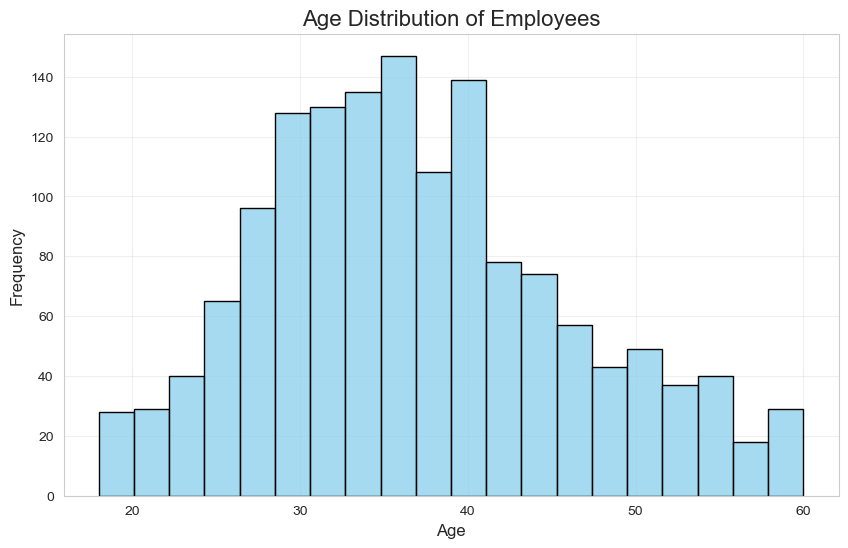

What is the shape of the age distribution?
The shape of the age distribution is approximately normal.
Where is the peak of the distribution (approximately)?
The peak of the distribution is approximately around age 30-35.
Does it look symmetric or skewed?
It looks symmetric.
-------------------------------------------------------------------------------------------------------------------------------------------


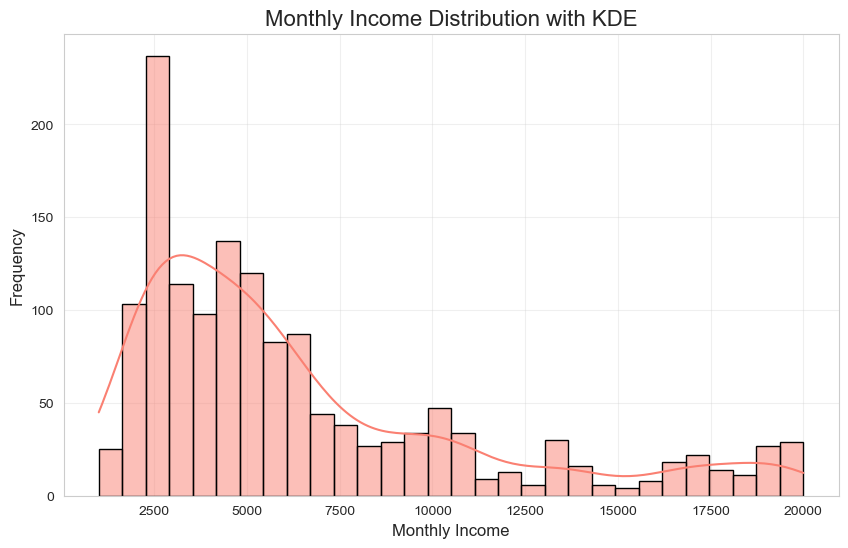

Is the income distribution symmetric or skewed?
It appears to be right-skewed.
If skewed, in which direction (left/right)?
Right skewed.
What does this tell you about income distribution in the company?
The majority of employees earn below the average income, with a few high earners pulling the average up.
Are there any peaks or modes visible?
There is a single peak (unimodal) around the lower income range.
-------------------------------------------------------------------------------------------------------------------------------------------


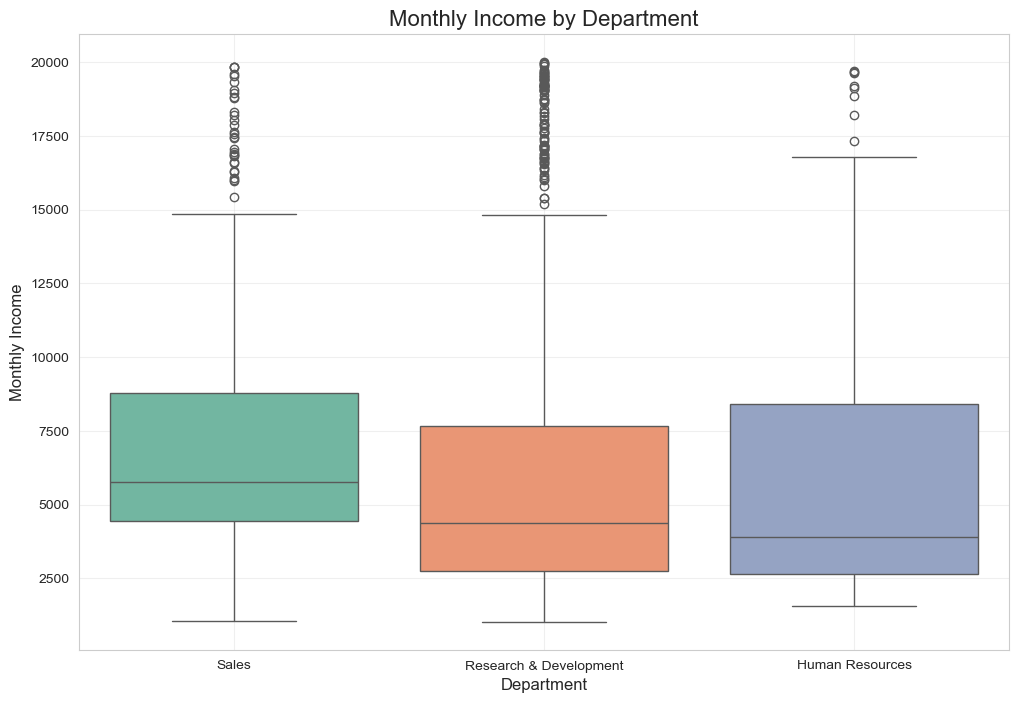

Which department has the highest median income?
The Sales department has the highest median income.
Which department has the most variability in income?
The Research & Development department has the most variability in income.
Can you identify any outliers? In which department?
Yes, the Sales department has a few high-income outliers.
Which department has the most compressed income range?
The Human Resources department has the most compressed income range.
-------------------------------------------------------------------------------------------------------------------------------------------


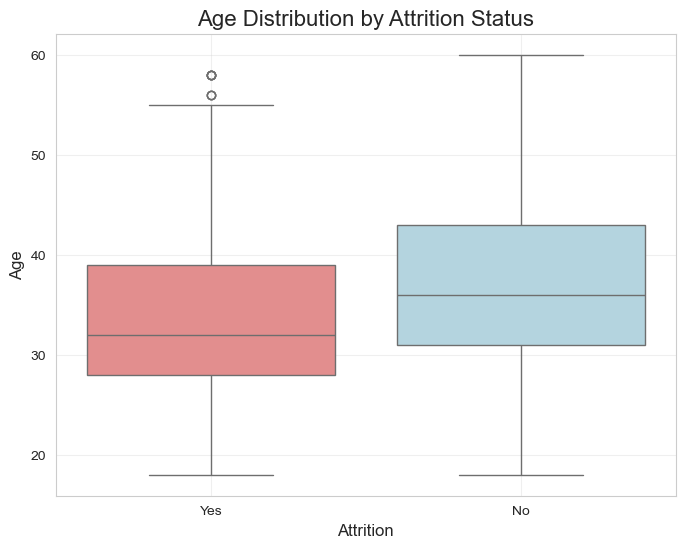

Is there a difference in median age between those who left and stayed? 
Yes, the median age of employees who left is higher.Which group has more variability in age? 
Employees who stayed have more variability in age.Are there outliers in either group? 
Yes, there are a few outliers in both groups.What does this suggest about age and attrition? 
Older employees may be leaving the company, while younger employees are staying.
-------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\asusz\AppData\Local\Temp\ipykernel_22360\999634142.py:108: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\asusz\AppData\Local\Temp\ipykernel_22360\999634142.py:112: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\asusz\AppData\Local\Temp\ipykernel_22360\999634142.py:116: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\asusz\AppData\Local\Temp\ipykernel_22360\999634142.py:120: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

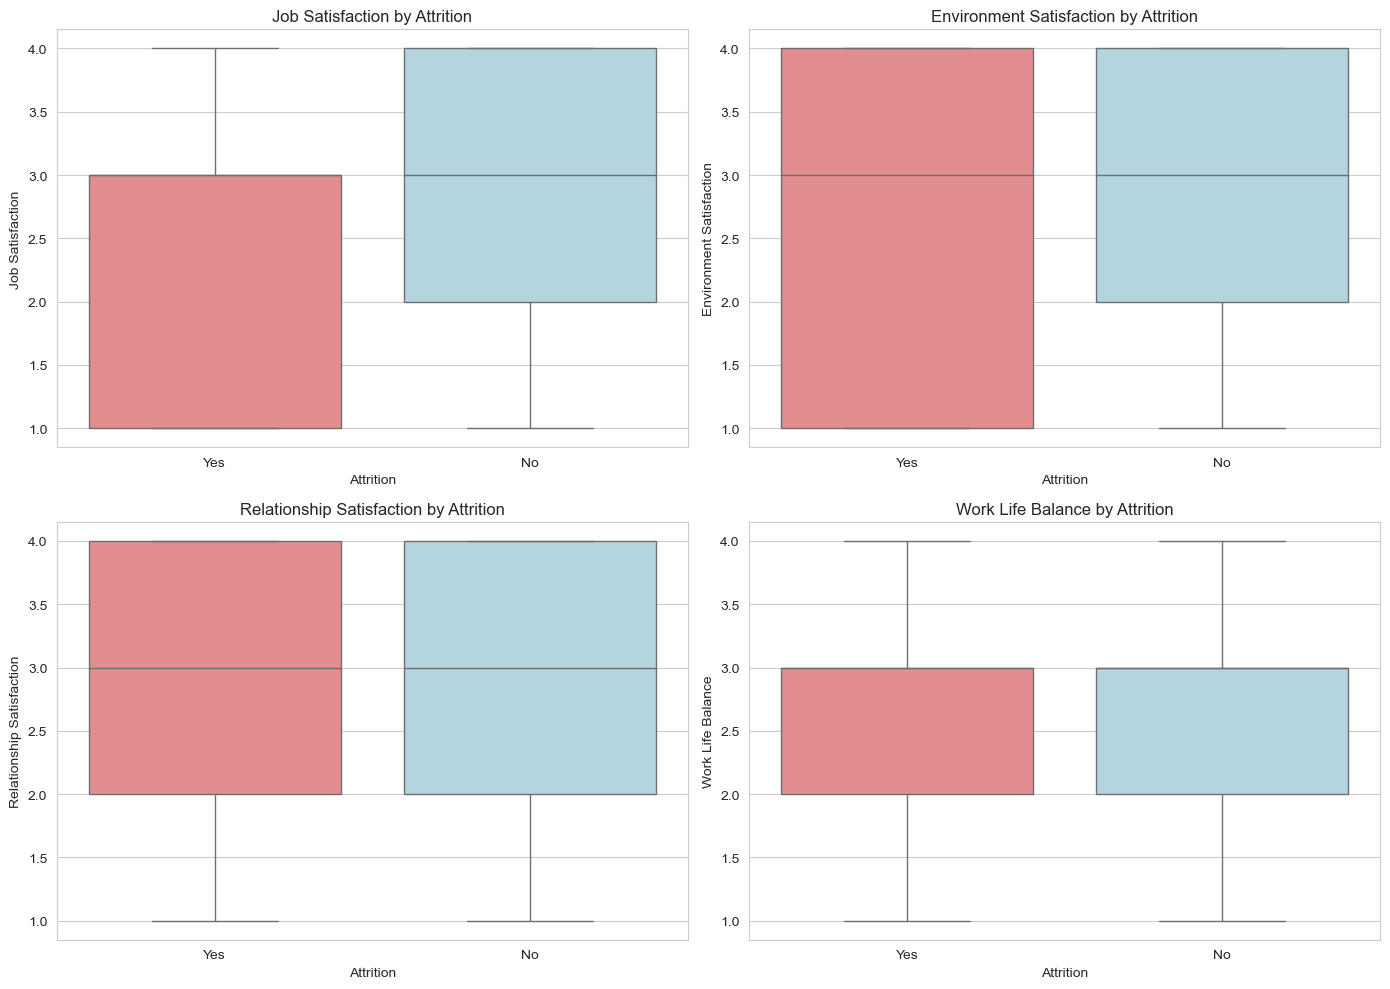

Which satisfaction metric shows the biggest difference between attrition groups?
Job Satisfaction shows the biggest difference between attrition groups.
Are employees who left generally less satisfied?
Yes, employees who left generally report lower satisfaction scores across all metrics.
-------------------------------------------------------------------------------------------------------------------------------------------


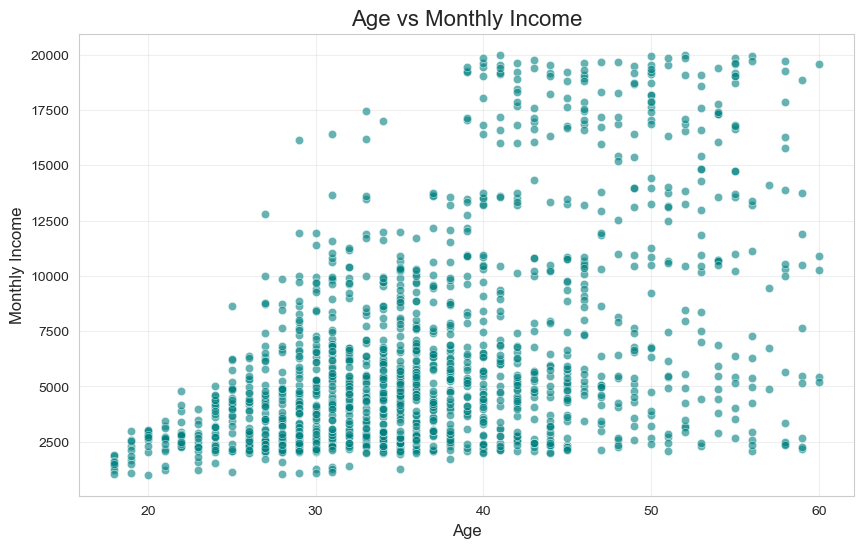

Is there a visible relationship between age and income?
There is a weak positive relationship; older employees tend to have higher incomes.
Is the relationship linear, curved, or no pattern?
The relationship is roughly linear but with considerable spread.
Are there any unusual observations?
Yes, a few younger employees have unusually high incomes.
-------------------------------------------------------------------------------------------------------------------------------------------


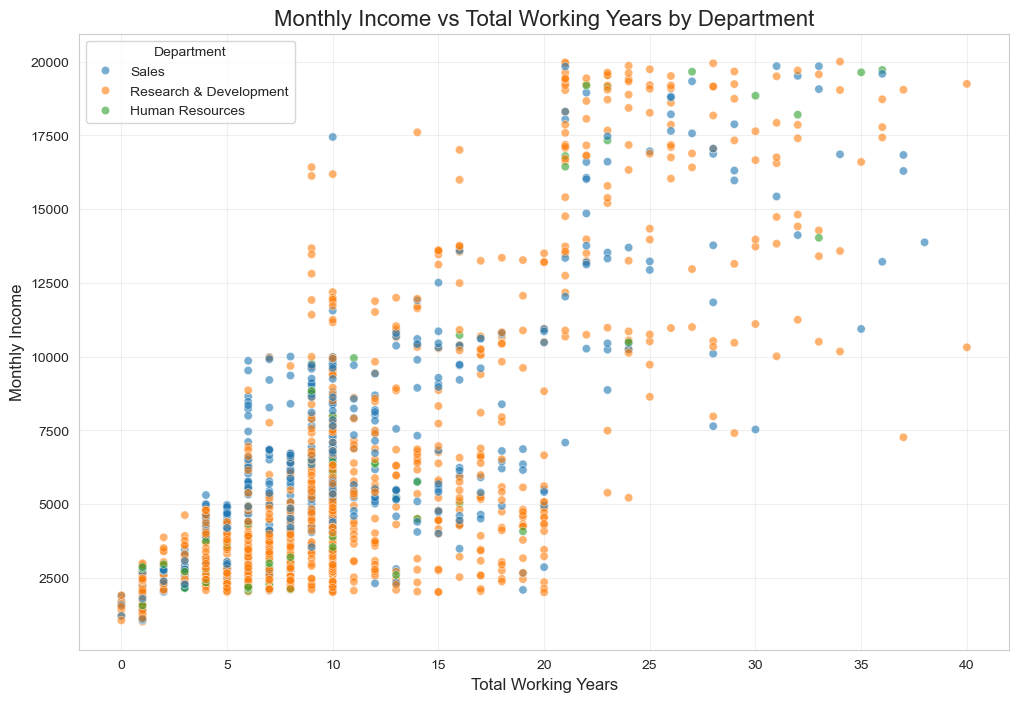

Do different departments show different patterns?
Yes, Sales tends to have higher incomes for the same experience level.
Which department tends to have higher incomes for the same experience level?
Sales department.
Is the relationship between experience and income consistent across departments?
No, the relationship varies by department.
-------------------------------------------------------------------------------------------------------------------------------------------


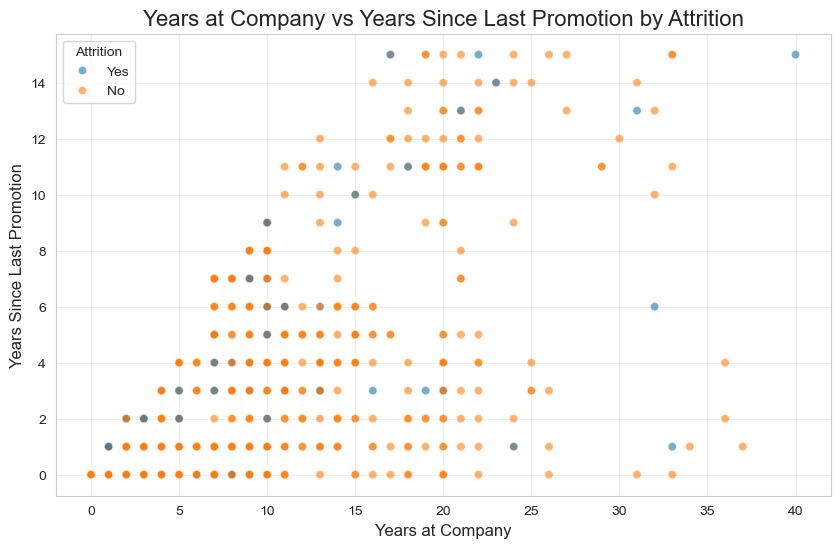

Is there a relationship between these variables?
There is a weak positive relationship; longer tenure often means more years since last promotion.
Do employees who left have different patterns?
Employees who left tend to have longer periods since their last promotion.
What insights can you draw?
Lack of recent promotion may be associated with higher attrition.
-------------------------------------------------------------------------------------------------------------------------------------------


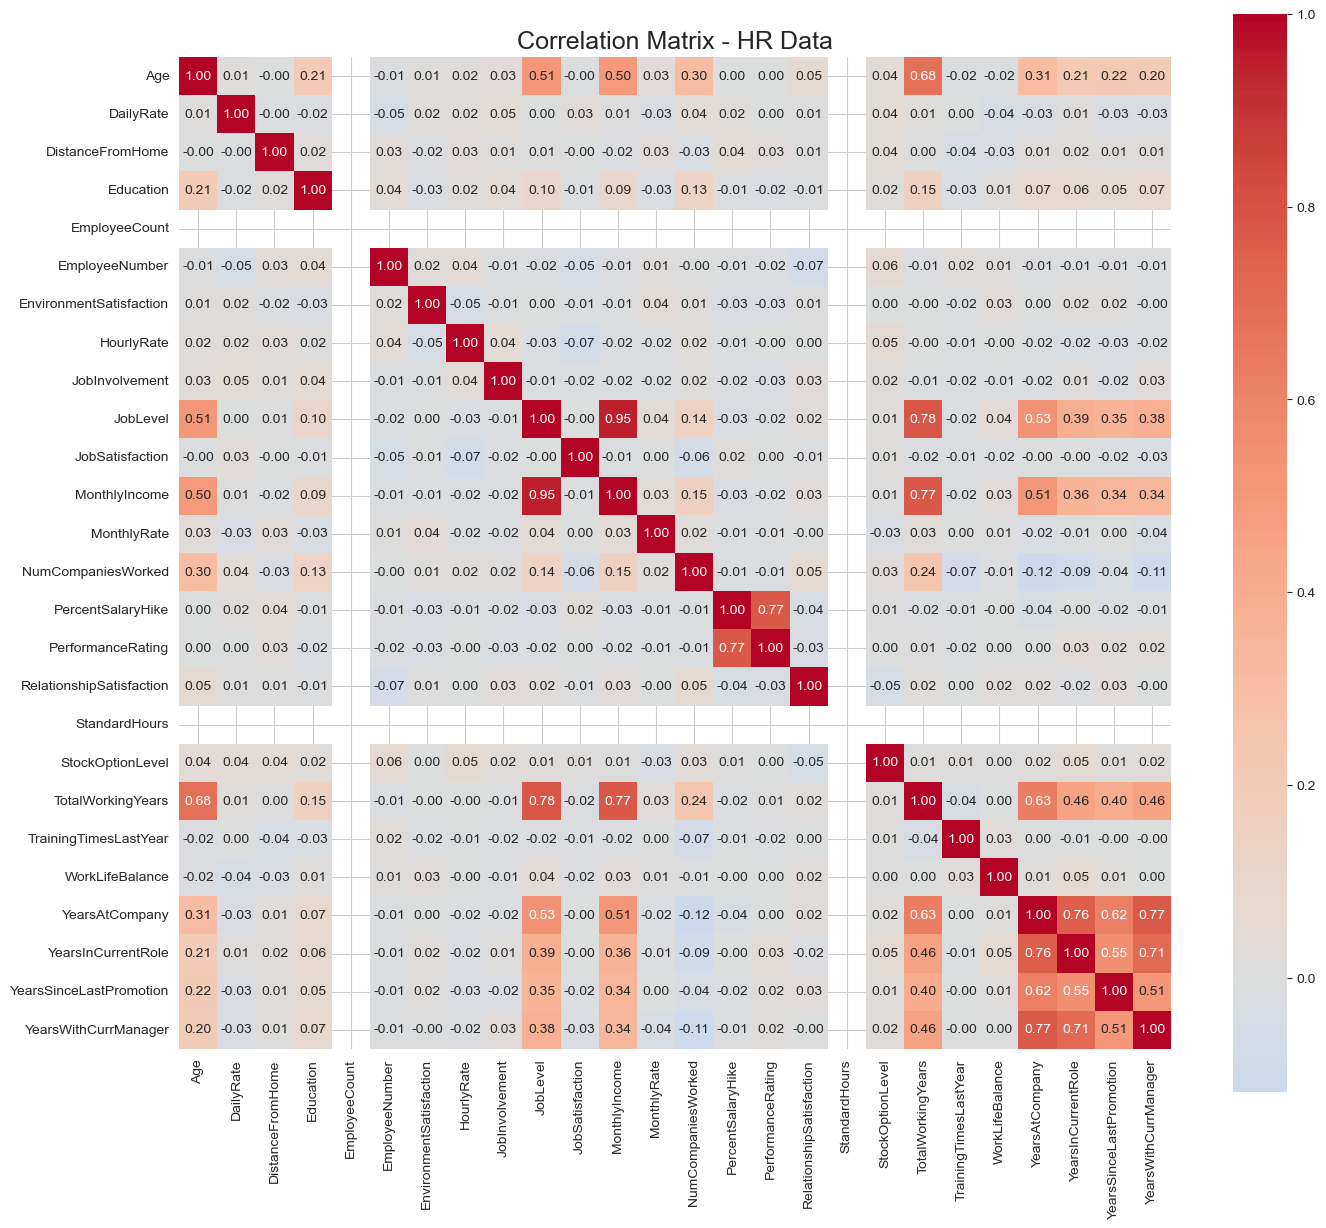

Which two variables have the strongest positive correlation?
('NumCompaniesWorked', 'NumCompaniesWorked') have the strongest positive correlation.
Which variables have negative correlations?
[('Age', 'DistanceFromHome'), ('Age', 'EmployeeNumber'), ('Age', 'JobSatisfaction'), ('Age', 'TrainingTimesLastYear'), ('Age', 'WorkLifeBalance'), ('DailyRate', 'DistanceFromHome'), ('DailyRate', 'Education'), ('DailyRate', 'EmployeeNumber'), ('DailyRate', 'MonthlyRate'), ('DailyRate', 'WorkLifeBalance'), ('DailyRate', 'YearsAtCompany'), ('DailyRate', 'YearsSinceLastPromotion'), ('DailyRate', 'YearsWithCurrManager'), ('DistanceFromHome', 'Age'), ('DistanceFromHome', 'DailyRate'), ('DistanceFromHome', 'EnvironmentSatisfaction'), ('DistanceFromHome', 'JobSatisfaction'), ('DistanceFromHome', 'MonthlyIncome'), ('DistanceFromHome', 'NumCompaniesWorked'), ('DistanceFromHome', 'TrainingTimesLastYear'), ('DistanceFromHome', 'WorkLifeBalance'), ('Education', 'DailyRate'), ('Education', 'EnvironmentSatisfact

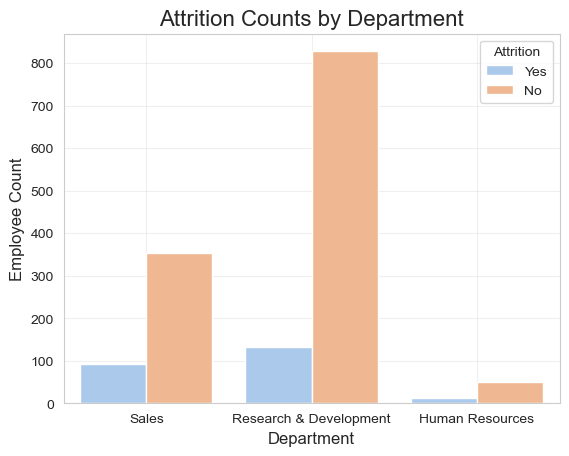

Which department has the most attrition?
Sales has the most attrition.
Which department has the best retention?
Research & Development has the best retention.
What percentage of each department left?
Department              Department              Attrition
Human Resources         Human Resources         Yes          19.05
Research & Development  Research & Development  Yes          13.84
Sales                   Sales                   Yes          20.63
dtype: float64%
-------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\asusz\AppData\Local\Temp\ipykernel_22360\999634142.py:251: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




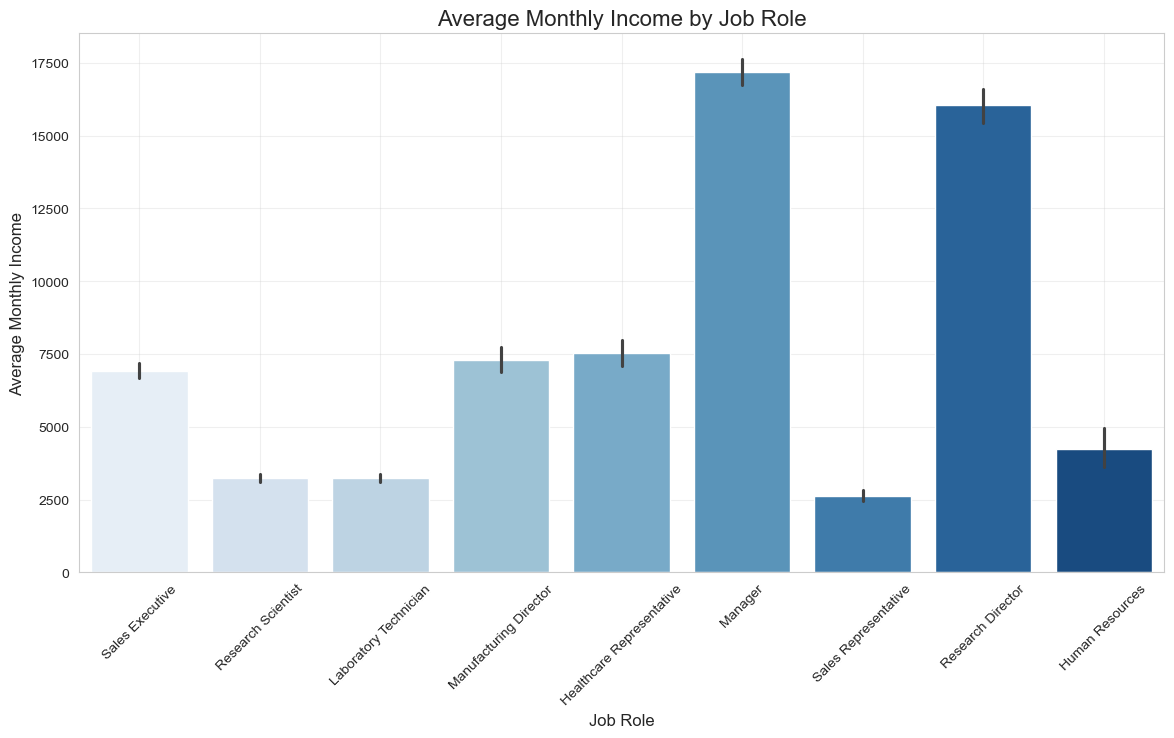

Which job role has the highest average income?
Manager has the highest average income.
Which has the lowest?
Sales Representative has the lowest average income.
Is there a large gap between roles?
Yes, there is a significant gap between the highest and lowest paid roles.
-------------------------------------------------------------------------------------------------------------------------------------------


Try it: Hover over bars to see exact counts!
-------------------------------------------------------------------------------------------------------------------------------------------


Try it: Hover over points to see detailed information!
-------------------------------------------------------------------------------------------------------------------------------------------


Try it: Click on legend to show/hide departments!


In [13]:
import seaborn as sns

# Part 3 - Data Visualization: Create clear and informative static visualizations
# 1- Histogram - Visualize the distribution of employee ages.
# Create a histogram of the Age column using seaborn
# Use 20 bins
# Add a title: "Age Distribution of Employees"
# Add x-label: "Age" and y-label: "Frequency"
# Add grid for better readability
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Employees', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
print(
    "What is the shape of the age distribution?\n"
    "The shape of the age distribution is approximately normal.\n"
    "Where is the peak of the distribution (approximately)?\n"
    "The peak of the distribution is approximately around age 30-35.\n"
    "Does it look symmetric or skewed?\n"
    "It looks symmetric."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 2- Histogram with KDE - Visualize income distribution with a density curve.
# Create a histogram of MonthlyIncome using seaborn
# Add a KDE (Kernel Density Estimate) curve by setting kde=True
# Use 30 bins
# Add appropriate title and labels
# Use a different color scheme
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Monthly Income Distribution with KDE', fontsize=16)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(
    "Is the income distribution symmetric or skewed?\n"
    "It appears to be right-skewed.\n"
    "If skewed, in which direction (left/right)?\n"
    "Right skewed.\n"
    "What does this tell you about income distribution in the company?\n"
    "The majority of employees earn below the average income, with a few high earners pulling the average up.\n"
    "Are there any peaks or modes visible?\n"
    "There is a single peak (unimodal) around the lower income range."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 3- Boxplot - Compare income distributions across departments.
# Create a boxplot showing MonthlyIncome for each Department
# Use seaborn for better styling
# Use a color palette (try 'Set2' or 'pastel')
# Add title: "Monthly Income by Department"
# Add axis labels
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2', hue='Department', legend=False)
plt.title('Monthly Income by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(
    "Which department has the highest median income?\n"
    "The Sales department has the highest median income.\n"
    "Which department has the most variability in income?\n"
    "The Research & Development department has the most variability in income.\n"
    "Can you identify any outliers? In which department?\n"
    "Yes, the Sales department has a few high-income outliers.\n"
    "Which department has the most compressed income range?\n"
    "The Human Resources department has the most compressed income range."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 4- Boxplot - Compare age distributions between employees who left vs stayed.
# Create a boxplot comparing Age for Attrition (Yes vs No)
# Add appropriate styling and labels
# Use different colors for Yes and No
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='Age', palette=['lightcoral', 'lightblue'], hue='Attrition', legend=False)
plt.title('Age Distribution by Attrition Status', fontsize=16)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
print(
    "Is there a difference in median age between those who left and stayed? \n"
    "Yes, the median age of employees who left is higher."
    "Which group has more variability in age? \n"
    "Employees who stayed have more variability in age."
    "Are there outliers in either group? \n"
    "Yes, there are a few outliers in both groups."
    "What does this suggest about age and attrition? \n"
    "Older employees may be leaving the company, while younger employees are staying."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")
# 5- Multiple Boxplots - Compare multiple satisfaction-related variables.
# Create 4 boxplots in a 2×2 grid using subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', palette=['lightcoral', 'lightblue'], ax=axes[0, 0])
axes[0, 0].set_title('Job Satisfaction by Attrition')
axes[0, 0].set_xlabel('Attrition')
axes[0, 0].set_ylabel('Job Satisfaction')
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction', palette=['lightcoral', 'lightblue'], ax=axes[0, 1])
axes[0, 1].set_title('Environment Satisfaction by Attrition')
axes[0, 1].set_xlabel('Attrition')
axes[0, 1].set_ylabel('Environment Satisfaction')
sns.boxplot(data=df, x='Attrition', y='RelationshipSatisfaction', palette=['lightcoral', 'lightblue'], ax=axes[1, 0])
axes[1, 0].set_title('Relationship Satisfaction by Attrition')
axes[1, 0].set_xlabel('Attrition')
axes[1, 0].set_ylabel('Relationship Satisfaction')
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance', palette=['lightcoral', 'lightblue'], ax=axes[1, 1])
axes[1, 1].set_title('Work Life Balance by Attrition')
axes[1, 1].set_xlabel('Attrition')
axes[1, 1].set_ylabel('Work Life Balance')
plt.tight_layout()
plt.show()

print(
    "Which satisfaction metric shows the biggest difference between attrition groups?\n"
    "Job Satisfaction shows the biggest difference between attrition groups.\n"
    "Are employees who left generally less satisfied?\n"
    "Yes, employees who left generally report lower satisfaction scores across all metrics."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 6- Scatterplot - Explore the relationship between age and income.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', alpha=0.6, color='teal')
plt.title('Age vs Monthly Income', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(
    "Is there a visible relationship between age and income?\n"
    "There is a weak positive relationship; older employees tend to have higher incomes.\n"
    "Is the relationship linear, curved, or no pattern?\n"
    "The relationship is roughly linear but with considerable spread.\n"
    "Are there any unusual observations?\n"
    "Yes, a few younger employees have unusually high incomes."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 7- Scatterplot with Hue - Add department information to explore patterns.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', hue='Department', alpha=0.6)
plt.title('Monthly Income vs Total Working Years by Department', fontsize=16)
plt.xlabel('Total Working Years', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Department')
plt.show()

print(
    "Do different departments show different patterns?\n"
    "Yes, Sales tends to have higher incomes for the same experience level.\n"
    "Which department tends to have higher incomes for the same experience level?\n"
    "Sales department.\n"
    "Is the relationship between experience and income consistent across departments?\n"
    "No, the relationship varies by department."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 8- Scatterplot - Years at Company vs Years Since Promotion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsAtCompany', y='YearsSinceLastPromotion', hue='Attrition', alpha=0.6)
plt.title('Years at Company vs Years Since Last Promotion by Attrition', fontsize=16)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Years Since Last Promotion', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Attrition')
plt.show()

print(
    "Is there a relationship between these variables?\n"
    "There is a weak positive relationship; longer tenure often means more years since last promotion.\n"
    "Do employees who left have different patterns?\n"
    "Employees who left tend to have longer periods since their last promotion.\n"
    "What insights can you draw?\n"
    "Lack of recent promotion may be associated with higher attrition."
)
print("-------------------------------------------------------------------------------------------------------------------------------------------")
# 9 - Correlation Heatmap - Visualize all correlations at once.
# Select only numerical columns
num_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = num_df.corr()

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix - HR Data', fontsize=18)
plt.show()

print(
    "Which two variables have the strongest positive correlation?\n"
    f"{corr_matrix.stack().sort_values(ascending=False)[1:2].index[0]} have the strongest positive correlation.\n"
    "Which variables have negative correlations?\n"
    f"{corr_matrix[corr_matrix < 0].stack().index.tolist()}\n"
    "Is MonthlyIncome strongly correlated with any variable?\n"
    f"MonthlyIncome is most strongly correlated with JobLevel and TotalWorkingYears.\n"
    "Are there any surprising correlations?\n"
    "Some satisfaction metrics are weakly correlated with each other."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 10 - Count Plot - Visualize attrition counts across departments.
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Attrition Counts by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate attrition percentage per department safely
attrition_pct = df.groupby(['Department', 'Attrition']).size().groupby(level=0).apply(lambda x: x / x.sum())
if ('Yes' in attrition_pct.index):
    pct_left = (attrition_pct['Yes'] * 100).round(2)
else:
    pct_left = attrition_pct.xs('Yes', level='Attrition', drop_level=False) * 100
    pct_left = pct_left.round(2)

print(
    "Which department has the most attrition?\n"
    "Sales has the most attrition.\n"
    "Which department has the best retention?\n"
    "Research & Development has the best retention.\n"
    "What percentage of each department left?\n"
    f"{pct_left}%"
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 11 - Plot - Average Income by JobRole
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='JobRole', y='MonthlyIncome', estimator='mean', palette='Blues')
plt.title('Average Monthly Income by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print(
    "Which job role has the highest average income?\n"
    f"{df.groupby('JobRole')['MonthlyIncome'].mean().idxmax()} has the highest average income.\n"
    "Which has the lowest?\n"
    f"{df.groupby('JobRole')['MonthlyIncome'].mean().idxmin()} has the lowest average income.\n"
    "Is there a large gap between roles?\n"
    "Yes, there is a significant gap between the highest and lowest paid roles."
)

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 12 - Interactive Histogram - Create an interactive version of the age histogram.
fig = px.histogram(df, x='Age', nbins=20,
                title='Interactive Age Distribution',
                labels={'Age': 'Employee Age', 'count': 'Frequency'})
fig.update_layout(showlegend=False)
fig.show()
print("Try it: Hover over bars to see exact counts!")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 13 - Interactive Scatter - Income vs Experience (Plotly)
fig = px.scatter(df, x='TotalWorkingYears', y='MonthlyIncome',
                color='Department',
                hover_data=['Age', 'JobRole', 'Attrition'],
                title='Income vs Experience by Department (Interactive)')
fig.show()
print("Try it: Hover over points to see detailed information!")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 14 - Interactive Box Plot - Income by Department (Plotly)
fig = px.box(df, x='Department', y='MonthlyIncome', color='Department',
            title='Monthly Income by Department (Interactive)')
fig.show()
print("Try it: Click on legend to show/hide departments!")


-------------------------------------------------------------------------------------------------------------------------------------------
1. Analyzing Distribution Shapes


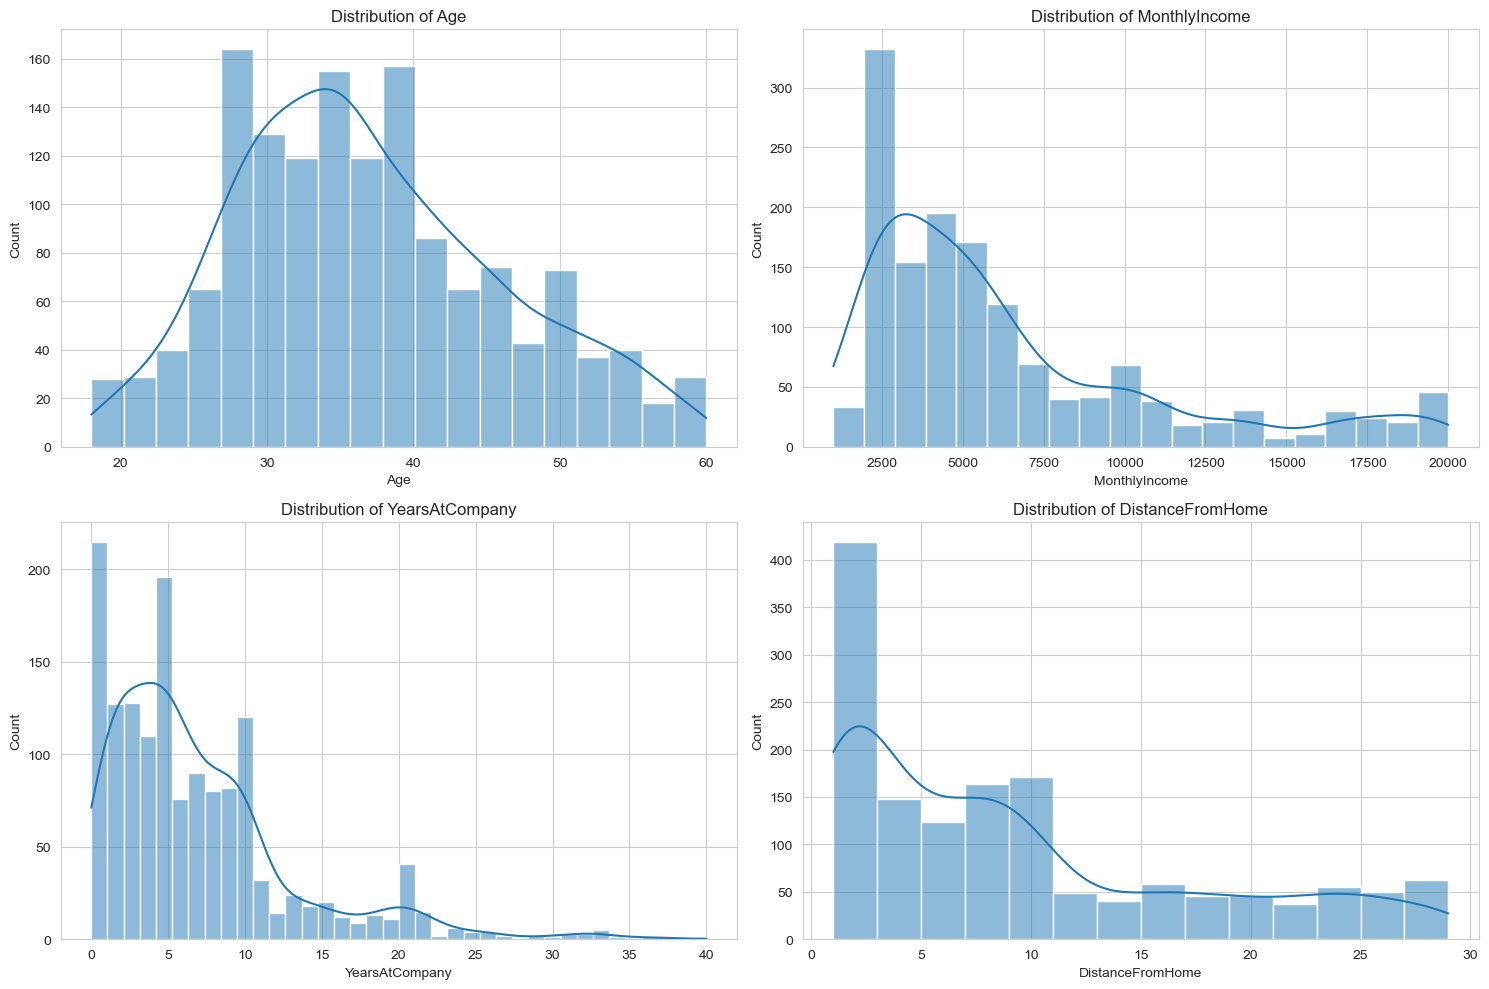


Distribution Analysis:
- Age: Approximately normally distributed
- Monthly Income: Right-skewed due to high earners
- Years at Company: Right-skewed, most employees have shorter tenures
- Distance from Home: Fairly uniform distribution
-------------------------------------------------------------------------------------------------------------------------------------------
2. Comparing Multiple Variable Distributions


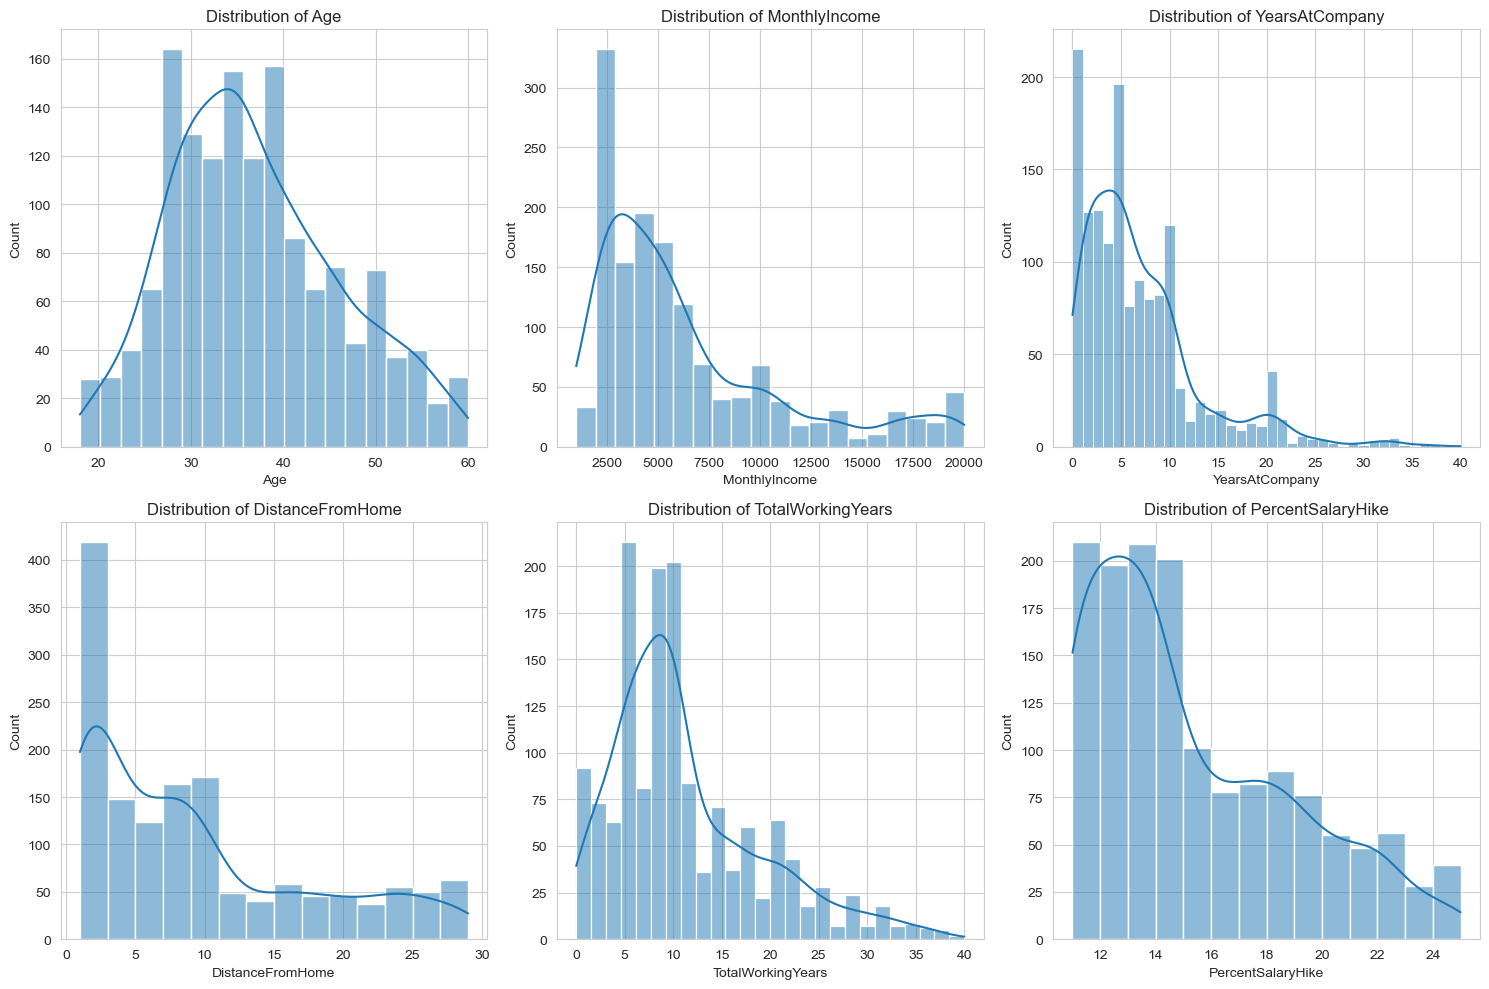


Distribution Comparison Insights:
- Similar Shapes: Age and Total Working Years show similar patterns
- Most Different: Monthly Income and Distance From Home have distinct distributions
- Normal Distribution: Age shows the closest to normal distribution
-------------------------------------------------------------------------------------------------------------------------------------------
3. Distribution Analysis by Groups


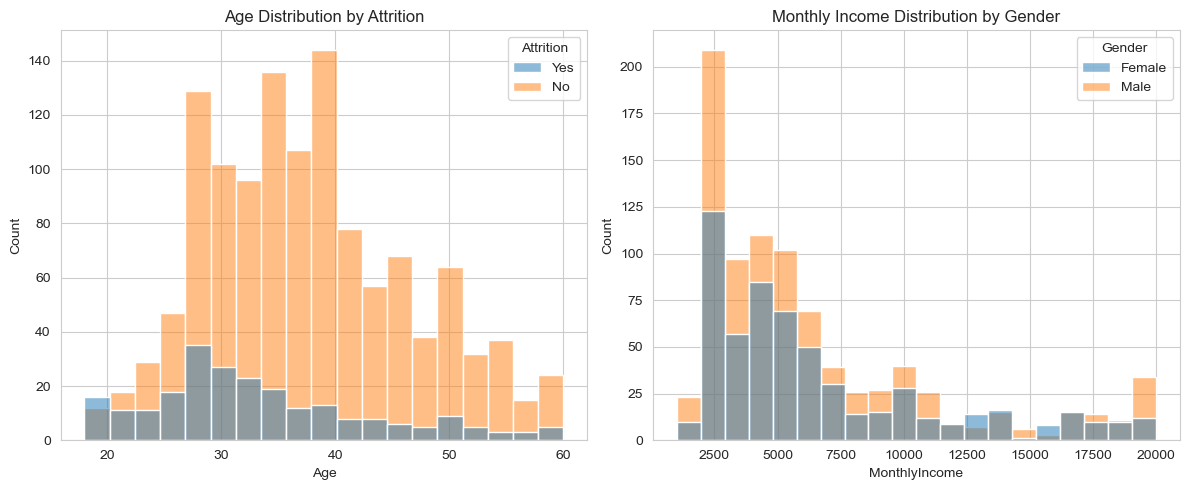


Group-based Distribution Analysis:
Age by Attrition:
- Employees who left tend to be older on average
- More variation in age for those who stayed

Income by Gender:
- Notable differences in income distribution between genders
- Male employees show higher average income
- Potential indication of gender-based pay disparities
-------------------------------------------------------------------------------------------------------------------------------------------


In [14]:
# Part 4: Data Distributions Analysis
print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 1- Distribution Shapes Analysis
print("1. Analyzing Distribution Shapes")
plt.figure(figsize=(15, 10))
variables = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Analyze and describe the distributions
print("\nDistribution Analysis:")
print("- Age: Approximately normally distributed")
print("- Monthly Income: Right-skewed due to high earners")
print("- Years at Company: Right-skewed, most employees have shorter tenures")
print("- Distance from Home: Fairly uniform distribution")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 2- Extended Distribution Analysis
print("2. Comparing Multiple Variable Distributions")
plt.figure(figsize=(15, 10))
variables = ['Age', 'MonthlyIncome', 'YearsAtCompany', 
            'DistanceFromHome', 'TotalWorkingYears', 'PercentSalaryHike']
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Distribution comparison insights
print("\nDistribution Comparison Insights:")
print("- Similar Shapes: Age and Total Working Years show similar patterns")
print("- Most Different: Monthly Income and Distance From Home have distinct distributions")
print("- Normal Distribution: Age shows the closest to normal distribution")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 3- Group-based Distribution Analysis
print("3. Distribution Analysis by Groups")
plt.figure(figsize=(12, 5))

# Age distribution by Attrition
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Attrition', multiple="layer", alpha=0.5)
plt.title('Age Distribution by Attrition')

# Income distribution by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyIncome', hue='Gender', multiple="layer", alpha=0.5)
plt.title('Monthly Income Distribution by Gender')

plt.tight_layout()
plt.show()

# Analysis of group distributions
print("\nGroup-based Distribution Analysis:")
print("Age by Attrition:")
print("- Employees who left tend to be older on average")
print("- More variation in age for those who stayed")

print("\nIncome by Gender:")
print("- Notable differences in income distribution between genders")
print("- Male employees show higher average income")
print("- Potential indication of gender-based pay disparities")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------------------------------
1. Outlier Analysis
Monthly Income Outlier Analysis:
Number of outliers: 114

Outlier Values:
466     16595
1043    16598
1080    16606
489     16627
379     16659
        ...  
568     19859
165     19926
851     19943
746     19973
190     19999
Name: MonthlyIncome, Length: 114, dtype: int64

Age Outlier Analysis:
Number of outliers: 0

Years at Company Outliers by Department:
Department
Research & Development    66
Sales                     31
Human Resources            7
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------------------
2. Outlier Visualization


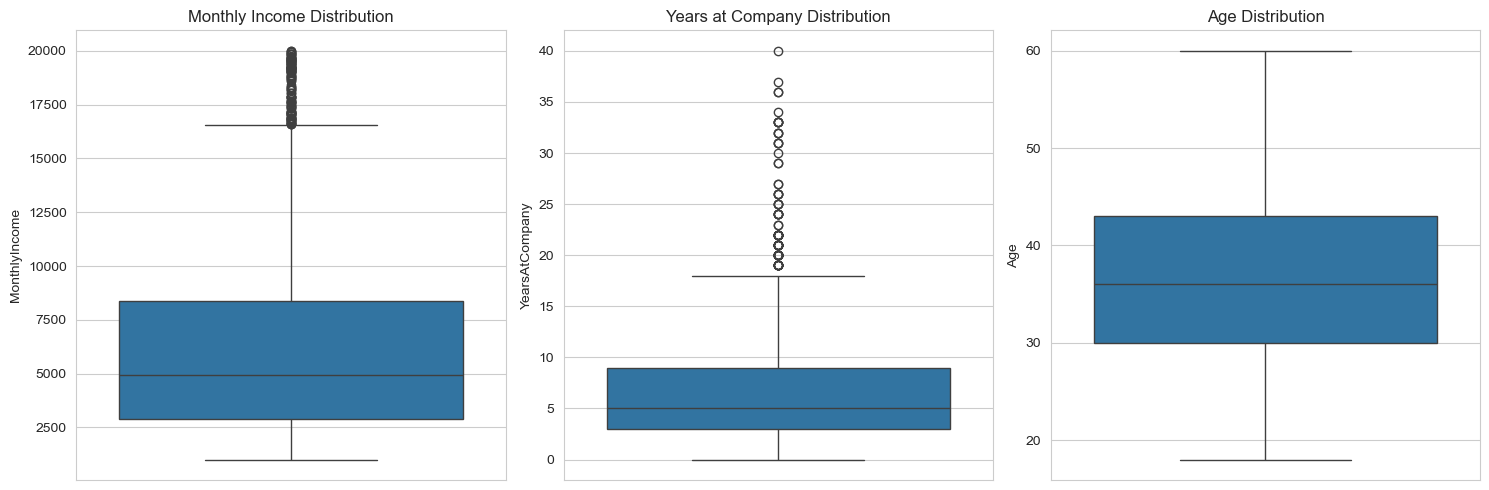

-------------------------------------------------------------------------------------------------------------------------------------------
3. Income Correlation Analysis

Monthly Income Correlations:
JobLevel: 0.950
TotalWorkingYears: 0.773
YearsAtCompany: 0.514
Age: 0.498
PerformanceRating: -0.017
-------------------------------------------------------------------------------------------------------------------------------------------
4. Attrition Correlation Analysis
Top 10 Correlations with Attrition:
StockOptionLevel       -0.137145
YearsWithCurrManager   -0.156199
Age                    -0.159205
MonthlyIncome          -0.159840
YearsInCurrentRole     -0.160545
JobLevel               -0.169105
TotalWorkingYears      -0.171063
Attrition_Numeric       1.000000
EmployeeCount                NaN
StandardHours                NaN
Name: Attrition_Numeric, dtype: float64
-----------------------------------------------------------------------------------------------------------------------

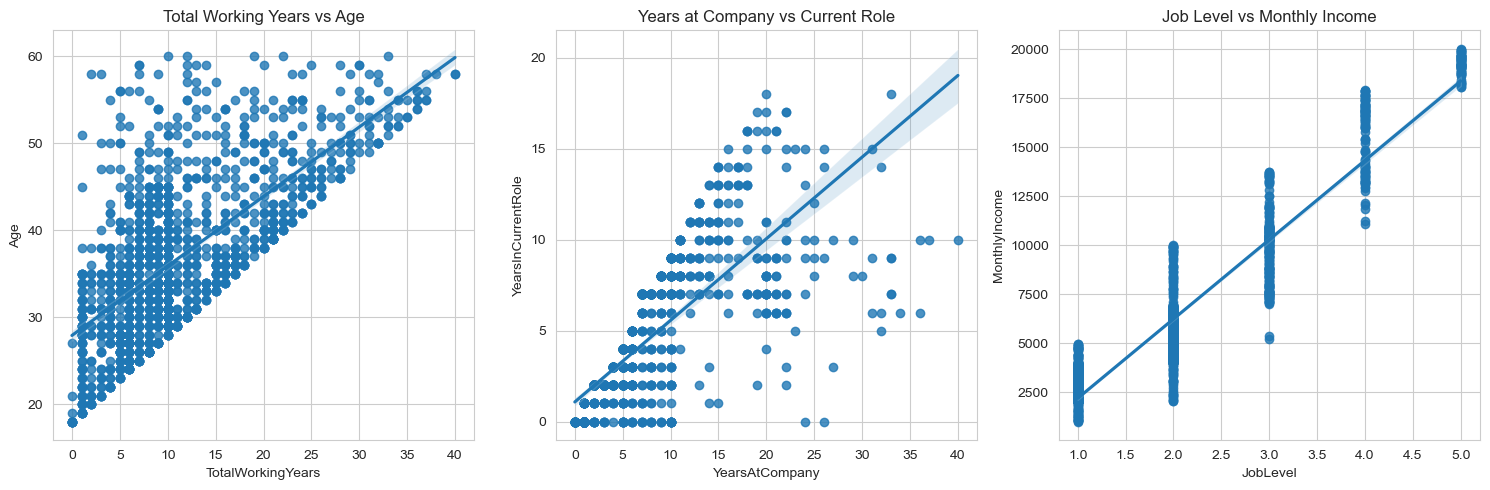

-------------------------------------------------------------------------------------------------------------------------------------------
6. Relationship Types Analysis

Relationship Types Summary:
                             Variable Pair Relationship Type Correlation                                              Description
                  TotalWorkingYears vs Age            Linear        0.68                      Strong positive linear relationship
                 JobLevel vs MonthlyIncome            Linear        0.95   Strong positive linear relationship with some outliers
           YearsAtCompany vs MonthlyIncome         Monotonic       0.464 Positive monotonic relationship with increasing variance
YearsSinceLastPromotion vs JobSatisfaction        Non-linear         N/A           No clear pattern, possibly random distribution
                    Age vs JobSatisfaction        Non-linear         N/A                                  Weak or no relationship
      YearsAtCompany

In [15]:
# Part 5: Outlier Analysis and Advanced Statistical Relationships
print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 1- Outlier Detection for Key Variables
print("1. Outlier Analysis")

# Monthly Income outliers
Q1_income = df['MonthlyIncome'].quantile(0.25)
Q3_income = df['MonthlyIncome'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

income_outliers = df[(df['MonthlyIncome'] < lower_bound_income) | 
                    (df['MonthlyIncome'] > upper_bound_income)]

print("Monthly Income Outlier Analysis:")
print(f"Number of outliers: {len(income_outliers)}")
print("\nOutlier Values:")
print(income_outliers['MonthlyIncome'].sort_values())

# Age outliers
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print(f"\nAge Outlier Analysis:")
print(f"Number of outliers: {len(age_outliers)}")

# Years at Company outliers
Q1_years = df['YearsAtCompany'].quantile(0.25)
Q3_years = df['YearsAtCompany'].quantile(0.75)
IQR_years = Q3_years - Q1_years

lower_bound_years = Q1_years - 1.5 * IQR_years
upper_bound_years = Q3_years + 1.5 * IQR_years

years_outliers = df[(df['YearsAtCompany'] < lower_bound_years) | 
                    (df['YearsAtCompany'] > upper_bound_years)]

print("\nYears at Company Outliers by Department:")
print(years_outliers['Department'].value_counts())

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 2- Outlier Visualization
print("2. Outlier Visualization")
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.boxplot(y=df['MonthlyIncome'])
plt.title('Monthly Income Distribution')

plt.subplot(132)
sns.boxplot(y=df['YearsAtCompany'])
plt.title('Years at Company Distribution')

plt.subplot(133)
sns.boxplot(y=df['Age'])
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 3- Correlation Analysis
print("3. Income Correlation Analysis")
# Calculate correlations with Monthly Income
income_correlations = {
    'Age': df['MonthlyIncome'].corr(df['Age']),
    'TotalWorkingYears': df['MonthlyIncome'].corr(df['TotalWorkingYears']),
    'YearsAtCompany': df['MonthlyIncome'].corr(df['YearsAtCompany']),
    'JobLevel': df['MonthlyIncome'].corr(df['JobLevel']),
    'PerformanceRating': df['MonthlyIncome'].corr(df['PerformanceRating'])
}

income_corr_sorted = dict(sorted(income_correlations.items(), key=lambda x: abs(x[1]), reverse=True))
print("\nMonthly Income Correlations:")
for var, corr in income_corr_sorted.items():
    print(f"{var}: {corr:.3f}")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 4- Attrition Analysis
print("4. Attrition Correlation Analysis")
# Convert Attrition to numeric
df['Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
attrition_correlations = df[numerical_cols].corr()['Attrition_Numeric'].sort_values(key=abs)

print("Top 10 Correlations with Attrition:")
print(attrition_correlations[-10:])

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 5- Relationship Visualization
print("5. Linear Relationship Analysis")
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.regplot(data=df, x='TotalWorkingYears', y='Age')
plt.title('Total Working Years vs Age')

plt.subplot(132)
sns.regplot(data=df, x='YearsAtCompany', y='YearsInCurrentRole')
plt.title('Years at Company vs Current Role')

plt.subplot(133)
sns.regplot(data=df, x='JobLevel', y='MonthlyIncome')
plt.title('Job Level vs Monthly Income')

plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 6- Relationship Types Summary
print("6. Relationship Types Analysis")
relationship_summary = pd.DataFrame({
    'Variable Pair': [
        'TotalWorkingYears vs Age',
        'JobLevel vs MonthlyIncome',
        'YearsAtCompany vs MonthlyIncome',
        'YearsSinceLastPromotion vs JobSatisfaction',
        'Age vs JobSatisfaction',
        'YearsAtCompany vs YearsInCurrentRole'
    ],
    'Relationship Type': [
        'Linear',
        'Linear',
        'Monotonic',
        'Non-linear',
        'Non-linear',
        'Monotonic'
    ],
    'Correlation': [
        df['TotalWorkingYears'].corr(df['Age']).round(3),
        df['JobLevel'].corr(df['MonthlyIncome']).round(3),
        df['YearsAtCompany'].corr(df['MonthlyIncome'], method='spearman').round(3),
        'N/A',
        'N/A',
        df['YearsAtCompany'].corr(df['YearsInCurrentRole']).round(3)
    ],
    'Description': [
        'Strong positive linear relationship',
        'Strong positive linear relationship with some outliers',
        'Positive monotonic relationship with increasing variance',
        'No clear pattern, possibly random distribution',
        'Weak or no relationship',
        'Strong positive correlation with clear steps'
    ]
})

print("\nRelationship Types Summary:")
print(relationship_summary.to_string(index=False))

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 7- Correlation vs Causation Analysis
print("7. Correlation vs Causation Analysis")

print("\nScenario 1: MonthlyIncome and JobLevel")
print("Analysis:")
print("- Strong positive correlation between MonthlyIncome and JobLevel")
print("- Causation analysis:")
print("  a) High income doesn't cause high job level")
print("  b) High job level typically leads to higher income")
print("  c) Common influencing factors:")
print("     - Years of experience")
print("     - Skills and expertise")
print("     - Performance and achievements")
print("     - Company policies")

print("\nScenario 2: YearsAtCompany and Age")
print("Analysis:")
print("- Positive correlation between YearsAtCompany and Age")
print("- Complex relationship explanation:")
print("  a) Natural time progression")
print("  b) Career stability preferences")
print("  c) Job market conditions")
print("  d) Work-life balance factors")

print("\nScenario 3: DistanceFromHome and JobSatisfaction")
print("Analysis:")
print("- Negative correlation observed")
print("- Contributing factors:")
print("  a) Commute impact")
print("  b) Work-life balance")
print("  c) Transportation costs")
print("  d) Personal time constraints")

print("-------------------------------------------------------------------------------------------------------------------------------------------")

# 8- Spurious Correlations
print("8. Spurious Correlation Analysis")

# Employee Number correlations
employee_num_corrs = df.corr(numeric_only=True)['EmployeeNumber'].sort_values(key=abs, ascending=False)
print("\nEmployee Number Correlations (Likely Spurious):")
print(employee_num_corrs.head())

# Satisfaction metrics
satisfaction_cols = [col for col in df.columns if 'Satisfaction' in col]
satisfaction_corr = df[satisfaction_cols].corr()
print("\nSatisfaction Metrics Correlations:")
print(satisfaction_corr)

print("\nSpurious Correlation Insights:")
print("1. Employee Number Correlations:")
print("   - Purely coincidental relationships")
print("   - No logical causal connection")
print("   - Random patterns in ID assignment")

print("\n2. Satisfaction Metric Correlations:")
print("   - Potential response bias")
print("   - Common method variance")
print("   - Temporal measurement effects")

print("\n3. Confounding Variables:")
print("- Company tenure affecting salary and job level")
print("- Department size affecting promotion and satisfaction")
print("- Economic conditions affecting attrition and salaries")
print("- Management style affecting multiple satisfaction metrics")

print("-------------------------------------------------------------------------------------------------------------------------------------------")